In [76]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [78]:
# Baca Data 
df = pd.read_csv("DATA_MAHASISWA_MATDIS_A_CLEAN.csv")

In [80]:
df.head()

,NPM,NAMA,ADIL DAN AMANAH,SUKA MEMBANTU,NYAMBUNG KALAU NGOROL,ASYIK DAN MENARIK
0,2.408301e+10,MADINA HEDY ALIFANTI,0.7,0.3,0.2,0.6
1,2.408301e+10,MARIA DWI KURNIASIH,0.5,0.6,0.2,0.6
2,2.408301e+10,ADINDA PUTRI RACHMAWATI,0.5,0.6,0.2,0.6
3,2.408301e+10,AQUINA SYABITA,0.5,0.6,0.2,0.6
4,2.408301e+10,VARID PUTRA PRATAMA,0.5,0.5,0.2,0.6


In [82]:
# 1. Tentukan bobot 
P = np.array([0.2, 0.3, 0.2, 0.3])   
print("=== Matrix P (bobot) ===")
print(P, "\n")

=== Matrix P (bobot) ===
[0.2 0.3 0.2 0.3] 



###
Matriks C berisi 4 aspek (A–D). Supaya bisa dipakai untuk pemeringkatan, setiap aspek diberi bobot (P) sesuai prioritas. 


In [85]:
# 2. Ambil hanya nilai A–D sebagai matriks C
C = df.iloc[:, 2:].to_numpy()
students = df.iloc[:, 1]  
criteria = ["Adil & amanah (A)",
            "Suka membantu (B)",
            "Nyambung kalo ngobrol (C)",
            "Asyik & menarik (D)"]

print("=== Matriks C (Nilai Mahasiswa) ===")
C_df = pd.DataFrame(C, index=students, columns=criteria)
print(C_df.to_string(index=True))   
print("\n")

=== Matriks C (Nilai Mahasiswa) ===
                                       Adil & amanah (A)  Suka membantu (B)  Nyambung kalo ngobrol (C)  Asyik & menarik (D)
NAMA                                                                                                                       
MADINA HEDY ALIFANTI                                 0.7                0.3                        0.2                  0.6
MARIA DWI KURNIASIH                                  0.5                0.6                        0.2                  0.6
ADINDA PUTRI RACHMAWATI                              0.5                0.6                        0.2                  0.6
AQUINA SYABITA                                       0.5                0.6                        0.2                  0.6
VARID PUTRA PRATAMA                                  0.5                0.5                        0.2                  0.6
GAITSA NAZWA KANSA                                   0.5                0.6                     

In [87]:
# 3. Hitung skor mahasiswa (C x P)
scores = C @ P

# Buat dataframe ranking
ranking_df = pd.DataFrame({
    "Mahasiswa": students,
    "Skor": scores
}).sort_values(by="Skor", ascending=False).reset_index(drop=True)
print("=== Ranking Mahasiswa (Semua) ===")
print(ranking_df.to_string(index=False), "\n")

# Ambil 4 teratas
top4_df = ranking_df.head(4)
print("=== 4 Mahasiswa Teratas ===")
print(top4_df.to_string(index=False))

=== Ranking Mahasiswa (Semua) ===
                            Mahasiswa  Skor
                    YUNIAR RACHMAWATI  0.88
                  Indra Maulana R F Y  0.88
           MUHAMMAD WILDAN SULTANSYAH  0.88
      RAVEENA AYU DESEMBER SURYOPUTRI  0.88
                  ACHMAD DANY GUNAWAN  0.88
                 AMELIA RIZQYNA PUTRI  0.88
                   AHMAD KENZY FARZAQ  0.88
                    ALFANI NUR AZIZAH  0.75
        Rizky Faza Hafiyyan Nusantara  0.75
           Muhammad Naufal Asruzzaman  0.75
                           VIA AMANDA  0.75
                    Gendis Poerbodani  0.73
                   ERIK SAPUTRA RIFKI  0.73
                  KIKY MAUDRY NATASYA  0.73
      MAULIDA APRILIA PUTRI HANDAYANI  0.73
           SITI NAIA HESTI RACHMAWATI  0.73
               Yohanes Olvin Jun Sole  0.70
             AULIYA KHOTIMATUZ ZAHROH  0.65
                  FANNY WIDYA CAHYANI  0.63
            Laudya Meitaneia Sianturi  0.61
                       Diah Anggraini  0.6

### 
Setelah dilakukan pembobotan dan matriks c dikalikan dengan matriks p maka akan diketahui skor setiapm mahasiswa. Dan terlihat bahwa 4 mahasiswa dengan skor tertinggi memiliki skor yang sama 

In [90]:
# 4. Kovarian antar kriteria
cov_mat = np.cov(C, rowvar=False, ddof=1)
cov_df = pd.DataFrame(cov_mat, index=criteria, columns=criteria)

print("=== Matriks Kovarian ===")
print(cov_df.to_string(float_format="%.2f"))
print("\n")

=== Matriks Kovarian ===
                           Adil & amanah (A)  Suka membantu (B)  Nyambung kalo ngobrol (C)  Asyik & menarik (D)
Adil & amanah (A)                       0.02               0.01                       0.03                 0.02
Suka membantu (B)                       0.01               0.01                       0.02                 0.01
Nyambung kalo ngobrol (C)               0.03               0.02                       0.08                 0.04
Asyik & menarik (D)                     0.02               0.01                       0.04                 0.02




### 
Varians terbesar ada di C (0.08) → artinya nilai “nyambung kalau ngobrol” paling menyebar antar mahasiswa. Jadi aspek ini paling membedakan mahasiswa.

Kovarian antar C–D (0.04) cukup besar → mahasiswa yang enak diajak ngobrol juga sering dianggap asyik.

Kovarian antar A–B (0.01) dan B–C (0.02) menunjukkan hubungan kecil tapi searah (positif).

Tidak ada kovarian negatif → semua aspek cenderung sejalan. 

In [93]:
# 5. Korelasi antar kriteria
corr_mat = np.corrcoef(C, rowvar=False)
corr_df = pd.DataFrame(corr_mat, index=criteria, columns=criteria)

print("=== Matriks Korelasi ===")
print(corr_df.to_string(float_format="%.2f"))
print("\n")

=== Matriks Korelasi ===
                           Adil & amanah (A)  Suka membantu (B)  Nyambung kalo ngobrol (C)  Asyik & menarik (D)
Adil & amanah (A)                       1.00               0.67                       0.80                 0.89
Suka membantu (B)                       0.67               1.00                       0.76                 0.84
Nyambung kalo ngobrol (C)               0.80               0.76                       1.00                 0.86
Asyik & menarik (D)                     0.89               0.84                       0.86                 1.00




#
Nilai korelasi antar-aspek tergolong kuat (≥0,67), sehingga keempat aspek saling mendukung. Korelasi tertinggi terdapat pada pasangan A–D (0,89), diikuti oleh C–D (0,86). Hal ini berarti mahasiswa yang dinilai adil dan amanah juga cenderung dianggap asyik, sementara mahasiswa yang nyambung dalam obrolan hampir selalu dinilai menarik. Hubungan ini penting karena ketika sebuah aspek diberi bobot lebih besar, maka aspek yang berkorelasi kuat dengannya juga ikut terangkat. Dengan demikian, hasil Top 4 yang diperoleh dari pembobotan dapat dijustifikasi dengan melihat konsistensi antar-aspek melalui korelasi.


In [96]:
# 6. Hitung Cosine Similarity antar mahasiswa
norms = np.linalg.norm(C, axis=1, keepdims=True)
cosine_sim = (C @ C.T) / (norms @ norms.T)

cosine_df = pd.DataFrame(cosine_sim, index=students, columns=students)

print("=== Cosine Similarity antar Mahasiswa ===")
print(cosine_df)

=== Cosine Similarity antar Mahasiswa ===
NAMA                                   MADINA HEDY ALIFANTI  \
NAMA                                                          
MADINA HEDY ALIFANTI                               1.000000   
MARIA DWI KURNIASIH                                0.934780   
ADINDA PUTRI RACHMAWATI                            0.934780   
AQUINA SYABITA                                     0.934780   
VARID PUTRA PRATAMA                                0.958315   
GAITSA NAZWA KANSA                                 0.934780   
HIZKIA SAMHAN REZAYOSHI                            0.934780   
RAVEENA AYU DESEMBER SURYOPUTRI                    0.907956   
Yohanes Olvin Jun Sole                             0.885714   
AISYAH AMALIA HAMID                                0.934780   
FEBRIANI YOLANDA TESSALONIKA                       0.905404   
AMELIA RIZQYNA PUTRI                               0.907956   
VIA AMANDA                                         0.900404   
FANNY WIDYA C

#
Analisis cosine similarity digunakan untuk melihat kemiripan profil mahasiswa berdasarkan vektor nilai A–D. Matriks kesamaan ini menunjukkan mahasiswa mana saja yang memiliki karakteristik sangat mirip (nilai similarity mendekati 1) dan siapa yang berbeda dari mayoritas. Dalam konteks pembobotan, cosine similarity dapat menjawab apakah keempat mahasiswa dengan skor tertinggi berasal dari profil yang mirip (misalnya sama-sama tinggi pada aspek B dan D) atau apakah mereka merepresentasikan variasi karakter yang berbeda. Dengan demikian, cosine similarity melengkapi analisis pemeringkatan dengan memberikan perspektif hubungan antarindividu, bukan hanya antar-aspek. Sebagai contoh mahasiswa yuniar dengan indra memiliki kemiripan dengan nilai 1 yang dimana berarti 2 mahasiswa tersebut memiliki aspek tinggi yang sama sehingga menjadi top 4 skor akhir.

In [99]:
# 7. K-Means Klustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(C)

cluster_df = pd.DataFrame({
    "Mahasiswa": students,
    "Skor": scores,
    "Cluster": labels
}).sort_values(by="Cluster")

# === 5. Tentukan arti cluster berdasarkan skor rata-rata ===
cluster_scores = cluster_df.groupby("Cluster")["Skor"].mean().sort_values()

# Buat mapping otomatis (rendah → sedang → tinggi)
interpretasi = {}
for i, cluster_id in enumerate(cluster_scores.index):
    if i == 0:
        interpretasi[cluster_id] = "Rendah"
    elif i == 1:
        interpretasi[cluster_id] = "Sedang"
    else:
        interpretasi[cluster_id] = "Tinggi"

# Tambahkan label interpretasi ke dataframe
cluster_df["Kategori"] = cluster_df["Cluster"].map(interpretasi)

# === 6. Output ===
print("=== Hasil K-Means Clustering (3 Grup) ===")
print(cluster_df.to_string(index=False), "\n")

print("=== Interpretasi Cluster ===")
for clust, arti in interpretasi.items():
    print(f"Cluster {clust} = {arti} (rata-rata skor = {cluster_scores[clust]:.2f})")

C:\Users\MSI CYBORG 15\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MSI CYBORG 15\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


=== Hasil K-Means Clustering (3 Grup) ===
                            Mahasiswa  Skor  Cluster Kategori
             AULIYA KHOTIMATUZ ZAHROH  0.65        0   Sedang
                SELVY DWI YULITA SARI  0.56        0   Sedang
                 ADRIAN VEDA DARMAWAN  0.53        0   Sedang
            Laudya Meitaneia Sianturi  0.61        0   Sedang
                  Izzati Kamila Putri  0.58        0   Sedang
           ESTHI NURANI SRI HANDAYANI  0.59        0   Sedang
         FEBRIANI YOLANDA TESSALONIKA  0.56        0   Sedang
                       Diah Anggraini  0.60        0   Sedang
                  FANNY WIDYA CAHYANI  0.63        0   Sedang
      MAULIDA APRILIA PUTRI HANDAYANI  0.73        1   Tinggi
                    Gendis Poerbodani  0.73        1   Tinggi
           MUHAMMAD WILDAN SULTANSYAH  0.88        1   Tinggi
                  KIKY MAUDRY NATASYA  0.73        1   Tinggi
                   AHMAD KENZY FARZAQ  0.88        1   Tinggi
                    ALFANI N

C:\Users\MSI CYBORG 15\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#
Analisis K-Means clustering membagi mahasiswa ke dalam tiga kelompok: Cluster 1 (tinggi, rata-rata skor 0,79), Cluster 0 (sedang, rata-rata skor 0,59), dan Cluster 2 (rendah, rata-rata skor 0,49). Kelompok dengan skor tinggi berisi mahasiswa yang menonjol dalam hampir semua aspek, sehingga konsisten dengan hasil Top 4 dari pembobotan. Artinya, mahasiswa yang terpilih sebagai Top 4 bukan hanya memiliki skor komposit terbaik, tetapi juga termasuk ke dalam cluster dengan karakteristik unggul menurut pengelompokan berbasis data. Sementara itu, cluster sedang berisi mahasiswa dengan pencapaian menengah, dan cluster rendah berisi mahasiswa dengan skor relatif kecil di sebagian besar aspek. Dengan kata lain, pembobotan menghasilkan peringkat individu terbaik, sedangkan K-Means memberikan gambaran kelompok besar yang menegaskan posisi relatif tiap mahasiswa.

Proporsi variansi yang dijelaskan: [0.90030611 0.05834694]
Total variansi terjelaskan: 0.9586530559068984


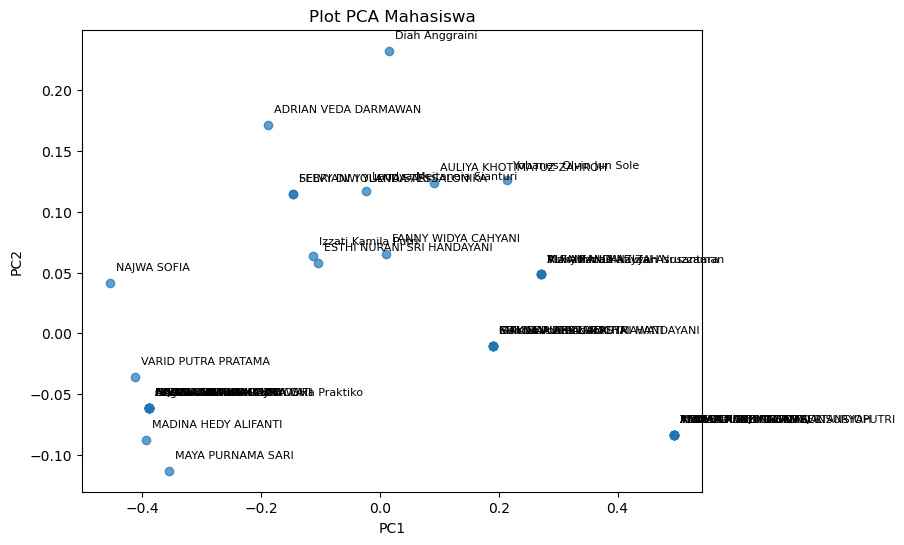

In [103]:
# 1. Import library
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2. Jalankan PCA pada matriks C (nilai mahasiswa, 4 variabel A–D)
pca = PCA(n_components=2)
C_pca = pca.fit_transform(C)   # C = matriks mahasiswa × 4 aspek

# 3. Variansi yang dijelaskan
explained_var = pca.explained_variance_ratio_
print("Proporsi variansi yang dijelaskan:", explained_var)
print("Total variansi terjelaskan:", explained_var.sum())

# 4. Visualisasi mahasiswa di ruang PCA
plt.figure(figsize=(8,6))
plt.scatter(C_pca[:,0], C_pca[:,1], alpha=0.7)

# Tambahkan label nama mahasiswa kalau ada variabel 'students'
for i, name in enumerate(students):   # pastikan 'students' = daftar nama mahasiswa
    plt.text(C_pca[i,0]+0.01, C_pca[i,1]+0.01, name, fontsize=8)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Plot PCA Mahasiswa")
plt.show()


Setelah dilakukan analisis dengan metode PCA (Principal Component Analysis), diperoleh dua komponen utama yang mampu merangkum variasi data mahasiswa dari empat kriteria penilaian. Komponen pertama (PC1) merepresentasikan aspek komunikasi dan kepribadian, yang mencakup kemampuan mahasiswa untuk nyambung diajak ngobrol serta sikap asyik dan menarik. Sementara itu, komponen kedua (PC2) lebih banyak menjelaskan perbedaan dari sisi tanggung jawab dan kepedulian, yaitu adil, amanah, dan suka membantu. Dengan kata lain, perbedaan utama antar mahasiswa dapat dijelaskan oleh dua dimensi besar: bagaimana mahasiswa berinteraksi secara sosial, serta bagaimana mereka menunjukkan sikap peduli dan bertanggung jawab.

Plot hasil PCA menunjukkan bahwa mahasiswa yang posisinya berdekatan memiliki karakter yang mirip, sedangkan yang posisinya jauh berarti memiliki ciri yang berbeda dari kebanyakan. Mahasiswa yang unggul biasanya berada di area positif PC1 dan PC2, artinya mereka kuat di semua aspek, baik dalam komunikasi maupun tanggung jawab sosial. Hal ini sejalan dengan hasil clustering K-Means sebelumnya, di mana kelompok mahasiswa dengan nilai tinggi juga terkumpul di area tersebut. 